# Binning 22 con Leave one out

In [2]:
import pandas as pd
import pandas_profiling
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import make_scorer
from sklearn import metrics
from sklearn import neighbors

#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_excel('C://Users//Stephanie//Desktop//dog proyect//prueba 3.xlsx')
df1=pd.read_excel('C://Users//Stephanie//Desktop//dog proyect//prueba 3.xlsx')

In [3]:
del df['Titulo']
del df['Vestidos para perros']
del df['en Camisas para perros']
del df['Chubasqueros para perros']
del df['Disfraces para perros']
del df['Sudaderas con capucha para perros']
del df['Ropa y accesorios para perros']
del df['Abrigos y chaquetas para perros']
del df['Jersey para perros']
del df['Botas y protectores de patas']
del df['Link']
df

,Categoría,Color,Material,Precio,Prime,Tallas,Epoca del año,Valoraciones,Promedio Estrellas (5),5 estrellas %,4 estrellas %,3 estrellas %,2 estrellas %,1 estrella %,Antigüedad del producto
0,Disfraces,Rojo,Acrílico transpirable,14.99,Si,S,Invierno,104,4.5,0.70,0.16,0.08,0.03,0.03,2019
1,Disfraces,Rojo,Acrílico transpirable,14.99,Si,M,Invierno,104,4.5,0.70,0.16,0.08,0.03,0.03,2019
2,Disfraces,Rojo,Acrílico transpirable,14.99,Si,L,Invierno,104,4.5,0.70,0.16,0.08,0.03,0.03,2019
3,Disfraces,Rojo,Acrílico transpirable,14.99,Si,XL,Invierno,104,4.5,0.70,0.16,0.08,0.03,0.03,2019
4,Chubasqueros,Azul,Poliester,11.99,Si,S,multiestacional,66,4.5,0.05,0.19,0.10,0.08,0.04,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111,Disfraces,Rojo,Algodón,23.55,No,M,multiestacional,5,3.5,0.22,0.38,0.24,0.00,0.16,2015
1112,Protector de patas,Negro,"Tela, Goma",12.99,Si,S,multiestacional,63,3.1,0.34,0.13,0.10,0.11,0.32,2017
1113,Protector de patas,Negro,"Tela, Goma",12.99,Si,M,multiestacional,63,3.1,0.34,0.13,0.10,0.11,0.32,2017
1114,Protector de patas,Negro,"Tela, Goma",13.99,Si,L,multiestacional,63,3.1,0.34,0.13,0.10,0.11,0.32,2017


In [4]:
columna = "Categoría" 
keys=df['Categoría'] .unique()
values=range(len(keys))
Categoría=dict(zip(keys,values))
df['Categoría']=df['Categoría'].replace(Categoría)

columna = "Material" 
keys=df['Material'] .unique()
values=range(len(keys))
Material=dict(zip(keys,values))
df['Material']=df['Material'].replace(Material)

columna = "Prime"
keys=df['Prime'] .unique()
values=range(len(keys))
Prime=dict(zip(keys,values))
df['Prime']=df['Prime'].replace(Prime)

columna = "Epoca del año"
keys=df['Epoca del año'] .unique()
values=range(len(keys))
Epoca=dict(zip(keys,values))
df['Epoca del año']=df['Epoca del año'].replace(Epoca)

columna = "Tallas"
keys=df['Tallas'] .unique()
values=range(len(keys))
Tallas=dict(zip(keys,values))
df['Tallas']=df['Tallas'].replace(Tallas)

columna = "Color"
keys=df['Color'] .unique()
values=range(len(keys))
Color=dict(zip(keys,values))
df['Color']=df['Color'].replace(Color)


# Se aplica el binning para precio

Text(0.5, 1.0, 'Precio')

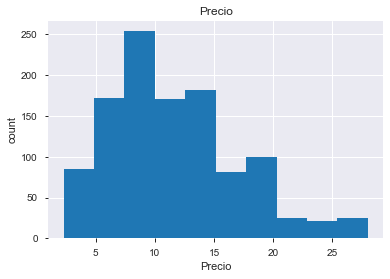

In [5]:
plt.hist(df["Precio"])
# set x/y labels and plot title
plt.xlabel("Precio")
plt.ylabel("count")
plt.title("Precio")

In [6]:
bins = np.linspace(min(df["Precio"]), max(df["Precio"]), 22)
bins

array([ 2.29      ,  3.51380952,  4.73761905,  5.96142857,  7.1852381 ,
        8.40904762,  9.63285714, 10.85666667, 12.08047619, 13.30428571,
       14.52809524, 15.75190476, 16.97571429, 18.19952381, 19.42333333,
       20.64714286, 21.87095238, 23.0947619 , 24.31857143, 25.54238095,
       26.76619048, 27.99      ])

In [7]:
group_names = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

In [8]:
df['Precios'] = pd.cut(df['Precio'], bins, labels=group_names, include_lowest=True )

In [9]:
df["Precios"].value_counts()

7     117
6     104
5     103
3      90
12     90
4      87
2      79
8      79
10     72
9      65
0      54
14     39
16     25
11     23
13     22
1      21
19     20
15     10
18      7
20      5
17      4
Name: Precios, dtype: int64

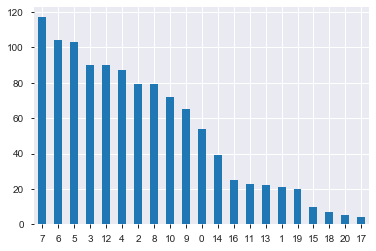

In [10]:
count_classes = pd.value_counts(df['Precios'], sort = True)
count_classes.plot(kind = 'bar', rot=0)

 # PRUEBA CON TOADAS LAS COLUMNAS 

In [11]:
X = np.asarray(df[['Categoría','Color','Material','Prime','Tallas','Epoca del año','Valoraciones','Promedio Estrellas (5)', '5 estrellas %','4 estrellas %','3 estrellas %','2 estrellas %','1 estrella %','Antigüedad del producto']])
y = np.asarray(df['Precios'])

# Leave one out

# kNN 

In [23]:
from sklearn import neighbors
from sklearn.model_selection import LeaveOneOut
from sklearn.naive_bayes import GaussianNB

loo = LeaveOneOut()
loo.get_n_splits(X)
yhat=[]
for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf = neighbors.KNeighborsClassifier(3, weights="distance")
    clf.fit(X_train, y_train)
    yhat1 = clf.predict(X_test)
    yhat.append(yhat1)
print("Precisión: ", precision_score(y, yhat,average='macro'))
print("Sensibilidad: ", recall_score(y, yhat,average='macro'))
print("F1-score: ", f1_score(y,yhat, average='macro'))
print("Accuracy: ", accuracy_score(y, yhat))

Precisión:  0.5468436961821747
Sensibilidad:  0.5426488770404363
F1-score:  0.54309196039044
Accuracy:  0.6612903225806451


C:\Users\Stephanie\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Stephanie\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# AdaBoost

In [24]:
from sklearn import neighbors
from sklearn.model_selection import LeaveOneOut
from sklearn.naive_bayes import GaussianNB

loo = LeaveOneOut()
loo.get_n_splits(X)
yhat=[]
for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf1 = AdaBoostClassifier(n_estimators=500)
    clf1.fit(X_train, y_train)
    yhat1 = clf1.predict(X_test)
    yhat.append(yhat1)
print("Precisión: ", precision_score(y, yhat,average='macro'))
print("Sensibilidad: ", recall_score(y, yhat,average='macro'))
print("F1-score: ", f1_score(y,yhat, average='macro'))
print("Accuracy: ", accuracy_score(y, yhat))

Precisión:  0.09689649452494391
Sensibilidad:  0.13562676468041146
F1-score:  0.09597147349777112
Accuracy:  0.19086021505376344


C:\Users\Stephanie\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Stephanie\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Random Forest 

In [28]:
from sklearn import neighbors
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import RandomForestClassifier


loo = LeaveOneOut()
loo.get_n_splits(X)
yhat=[]
for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    ramf = RandomForestClassifier(n_estimators =500)
    ramf.fit(X_train, y_train)
    yhat1 = ramf.predict(X_test)
    yhat.append(yhat1)
print("Precisión: ", precision_score(y, yhat,average='macro'))
print("Sensibilidad: ", recall_score(y, yhat,average='macro'))
print("F1-score: ", f1_score(y,yhat, average='macro'))
print("Accuracy: ", accuracy_score(y, yhat))

Precisión:  0.6803314514224476
Sensibilidad:  0.6713362420456666
F1-score:  0.6715260246328347
Accuracy:  0.7580645161290323


# Decision Tree

In [17]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

loo = LeaveOneOut()
loo.get_n_splits(X)
yhat=[]
for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf3 = DecisionTreeClassifier(random_state=0)
    clf3.fit(X_train, y_train)
    yhat1 = clf3.predict(X_test)
    yhat.append(yhat1)
print("Precisión: ", precision_score(y, yhat,average='macro'))
print("Sensibilidad: ", recall_score(y, yhat,average='macro'))
print("F1-score: ", f1_score(y,yhat, average='macro'))
print("Accuracy: ", accuracy_score(y, yhat))

Precisión:  0.7562387783707416
Sensibilidad:  0.7572341905437456
F1-score:  0.7538103190275498
Accuracy:  0.8055555555555556


In [7]:
df_results= pd.DataFrame(columns=['Accuracy Leave One Out', 'Accuracy Holdout'], index=['Knn', 'Adaboost', 'Decision Tree'])
df_results.loc['Knn'] = [0.66, 0.58 ]
df_results.loc['Adaboost'] = [0.19, 0.19 ]
df_results.loc['Decision Tree'] = [0.80, "-"]
df_results.loc['Random Forest'] = [0.75, 0.71]
df_results

,Accuracy Leave One Out,Accuracy Holdout
Knn,0.66,0.58
Adaboost,0.19,0.19
Decision Tree,0.8,-
Random Forest,0.75,0.71
